In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

In [2]:
ki_x = [0.001,0.005,0.01,0.02,0.03,0.04,0.05]
ki_c = [60.61,293.5,591.2,1144,1696,2256,2801]

In [3]:
kcl_x = [0.0001,0.00025,0.0005,0.001,0.0015,0.002,0.0025]
kcl_c = [4.01,11.64,27.78,53.50,81.40,103.0,128.1]

In [4]:
def quad(x,a,b,c):
  return a * x**2 + b * x + c

def inv_quad_p(y,a,b,c):
  return - b/(2*a) + np.sqrt(b**2 - 4*a*(c-y))/(2*a)

def inv_quad_n(y,a,b,c):
  return - b/(2*a) - np.sqrt(b**2 - 4*a*(c-y))/(2*a)

In [5]:
def kohl(x,lm,k):
  return lm * x + k * x ** 1.5

In [6]:
def exp_n(x,a,k,c):
  return a * np.exp(k*x) + c

def inv_exp(cond,a,k,c):
    return np.log( (cond - c) / a ) / k

In [7]:
def exp_fit(x,a,b,k):
    return a * np.exp(- k * x) + b

In [8]:
def onsager_alpha(l_0,D,T,eta):
    return 8.2E5 * l_0 * (D * T) ** -1.5 + 82 * (D * T) ** -0.5 / eta

def z(alpha,lambda_0,c,lambda_c):
    return alpha * lambda_0 ** -1.5 * np.sqrt( c * lambda_c )

def S(z):
    return ( z/2 + np.sqrt( 1 + (z/2) ** 2 ) ) ** 2

def beta_1933(D,k,T,e):
    return 0.4343 * ( e ** 2 / ( 2 * D * k * T ) ) * ( ( 8 * np.pi * 6.022E23 * e ** 2 ) / ( 1000 * D * k * T ) ) ** 0.5

def F(z):
    return 1 - z * ( 1 - z * ( 1 - z * ( 1 - z ) ** -0.5 ) ** -0.5 ) ** -0.5

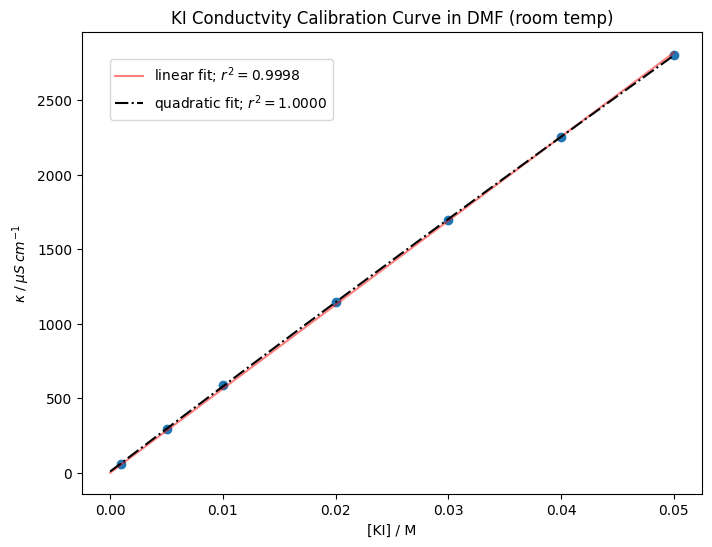

In [9]:
# KI Calibration
plt.figure(figsize=(8,6))

x=np.array(ki_x)
y=np.array(ki_c)
plt.scatter(x,y)

xs = np.linspace(0,0.05,10)

# straight line fit for whole fit
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(x.reshape(-1,1),y.reshape(-1,1))
m_i = lin_reg.coef_[0][0]
s = lin_reg.score(x.reshape(-1,1),y.reshape(-1,1))
plt.plot(xs,(m_i*xs),'r-',alpha=0.5, label=f'linear fit; $r^2 = {s:.4f}$')


# straight line fit for initial line
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(x.reshape(-1,1),y.reshape(-1,1))
m2_i = lin_reg.coef_[0][0]
c2_i = lin_reg.intercept_[0]
s2 = lin_reg.score(x[:6].reshape(-1,1),y[:6].reshape(-1,1))
#plt.plot(xs,(m2_i*xs + c2_i),'k-',alpha=.6, label=f'linear fit; $r^2 = {s2:.4f}$')


# quadratic fit
popt_i, pcov = curve_fit( quad, x , y )

# r^2
residuals = y - quad(x, *popt_i)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
s3 = 1 - (ss_res / ss_tot)
plt.plot(xs,quad(xs,*popt_i), 'k-.', alpha = 1, label=f'quadratic fit; $r^2 = {s3:.4f}$')

# Kohlrausch fit
popk_i, pcov = curve_fit( kohl, x , y )
residuals2 = y - kohl(x, *popk_i)
ss_res2 = np.sum(residuals2**2)
ss_tot2 = np.sum((y-np.mean(y))**2)
s4 = 1 - (ss_res2 / ss_tot2)
#plt.plot(xs,kohl(xs,*popk_i), 'b--', alpha = .5, label=f'kohlrausch fit; $r^2 = {s4:.4f}$')

plt.title('KI Conductvity Calibration Curve in DMF (room temp)')
plt.xlabel('[KI] / M')
plt.ylabel('$\kappa \hspace{.3} / \hspace{.3} \mu S \hspace{.2} cm^{-1}$')
plt.legend(borderaxespad=2)
plt.show()

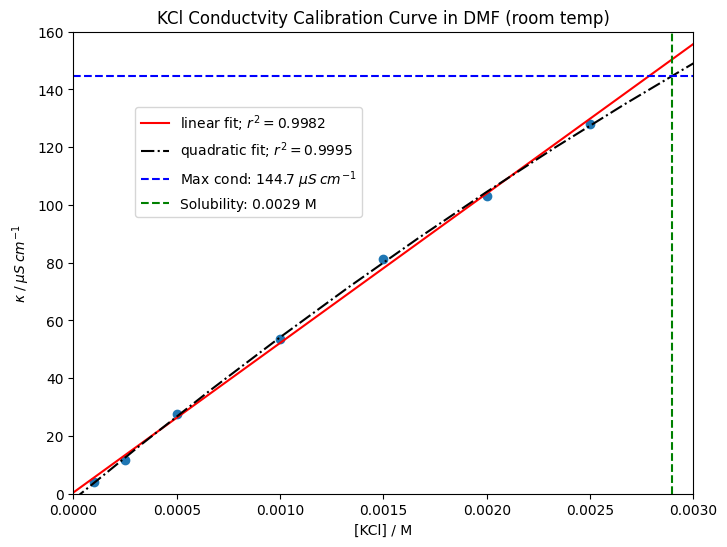

In [12]:
plt.figure(figsize=(8,6))

# KCl Calibration
x=np.array(kcl_x)
y=np.array(kcl_c)
plt.scatter(x,y)

xs = np.linspace(0,0.003,10)

# straight line fit for whole fit
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(x.reshape(-1,1),y.reshape(-1,1))
m_cl = lin_reg.coef_[0][0]
c_cl = lin_reg.intercept_[0]
s = lin_reg.score(x.reshape(-1,1),y.reshape(-1,1))
plt.plot(xs,(m_cl*xs + c_cl),'r-',alpha=1, label=f'linear fit; $r^2 = {s:.4f}$')

"""
# straight line fit for initial line
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(x[:6].reshape(-1,1),y[:6].reshape(-1,1))
m2_cl = lin_reg.coef_[0][0]
c2_cl = lin_reg.intercept_[0]
s2 = lin_reg.score(x[:6].reshape(-1,1),y[:6].reshape(-1,1))
plt.plot(xs,(m2_cl*xs + c2_cl),'g-',alpha=0.5, label=f'initial linear fit; $r^2 = {s2:.4f}$')
"""

popt_cl, pcov = curve_fit( quad, x , y )

# r^2
residuals = y - quad(x, *popt_cl)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
s3 = 1 - (ss_res / ss_tot)
plt.plot(xs,quad(xs,*popt_cl), 'k-.', alpha = 1, label=f'quadratic fit; $r^2 = {s3:.4f}$')

ys=np.linspace(0,160,10)

# uncomment after running once with cell below :)
#plt.plot(xs,max_cond_cl*np.ones(len(xs)),'b--',label=f"Max cond: {max_cond_cl} $\mu S \hspace{{{.2}}} cm^{{{-1}}}$")
#plt.plot(max_conc_cl*np.ones(len(ys)),ys,'g--',label=f"Solubility: {max_conc_cl:.4f} M")


plt.xlim(0,0.003)
plt.ylim(0,160)

plt.title('KCl Conductvity Calibration Curve in DMF (room temp)')
plt.xlabel('[KCl] / M')
plt.ylabel('$\kappa \hspace{.3} / \hspace{.3} \mu S \hspace{.2} cm^{-1}$')
plt.legend(loc = (0.1,0.6))
plt.show()

In [11]:
max_cond_cl = 144.7
#max_conc_cl = max_cond_cl / m_cl
max_conc_cl = inv_quad_p(max_cond_cl,*popt_cl)
max_conc_cl*74.55*0.944 # g/kg solvent

0.20382421657036093

In [27]:
max_conc_cl

0.00289625061911527

In [131]:
# data for 50 degree run

In [13]:
cal50_1 = (0.0393 / 166.0028) * 1000 / 5
cal50_2 = cal50_1 / 5
cal50_3 = (0.1028 / 166.0028) * 1000 / 10 #17.05
cal50_4 = (0.2880 / 166.0028) * 1000 / 30 #Easy_1 24.05

In [19]:
x_new = [0.01,0.02,0.04,0.05]
ki_new = [620.1,1193,2352,2969]
ki_new_50 = [1020,1816,3509,4440]

In [20]:
x_newer = [0,cal50_2,cal50_1,cal50_3,cal50_4]
ki_newer_50 = [142.9,1006,6679,8818,7246]

In [21]:
ki_30_x = [0,0.03022,0.04078,0.060441]
ki_30 = [37,1833,2431,3652]

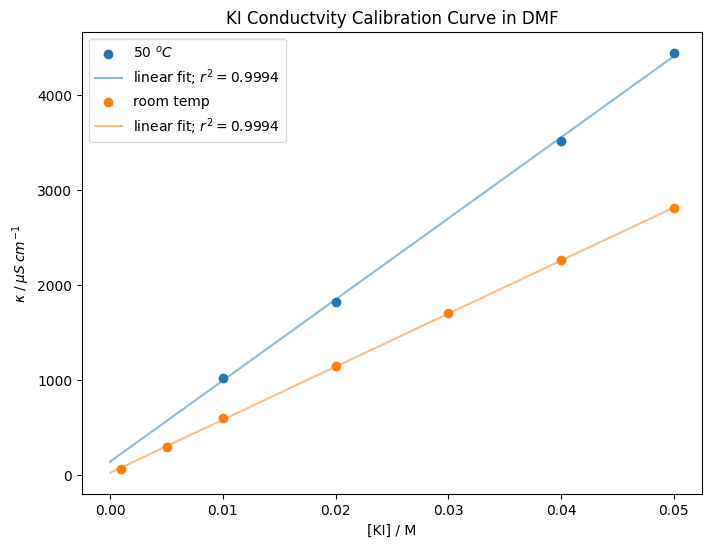

In [22]:
plt.figure(figsize=(8,6))

xs = np.linspace(0,0.05,10)

"""
x = np.array(x_new).reshape(-1,1)
y = np.array(ki_new).reshape(-1,1)
plt.scatter(x,y,label='22 deg')
# straight line fit for whole fit
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(x.reshape(-1,1),y.reshape(-1,1))
m_22n_i = lin_reg.coef_[0][0]
c_22n_i = lin_reg.intercept_[0]
s = lin_reg.score(x.reshape(-1,1),y.reshape(-1,1))
plt.plot(xs,(m_22n_i*xs + c_22n_i),alpha=0.5, label=f'linear fit; $r^2 = {s:.4f}$')
"""

x = np.array(x_new).reshape(-1,1)
y = np.array(ki_new_50).reshape(-1,1)
plt.scatter(x,y,label='50 $^oC$')
# straight line fit for whole fit
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(x.reshape(-1,1),y.reshape(-1,1))
m_50n_i = lin_reg.coef_[0][0]
c_50n_i = lin_reg.intercept_[0]
s = lin_reg.score(x.reshape(-1,1),y.reshape(-1,1))
plt.plot(xs,(m_50n_i*xs + c_50n_i),alpha=0.5, label=f'linear fit; $r^2 = {s:.4f}$')


x = np.array(ki_x).reshape(-1,1)
y = np.array(ki_c).reshape(-1,1)
plt.scatter(x,y,label='room temp')
plt.plot(xs,(m2_i*xs + c2_i),alpha=0.5, label=f'linear fit; $r^2 = {s:.4f}$')

plt.title('KI Conductvity Calibration Curve in DMF')
plt.xlabel('[KI] / M')
plt.ylabel('$\kappa \hspace{.3} / \hspace{.3} \mu S \hspace{.2} cm^{-1}$')
plt.legend()
plt.show()

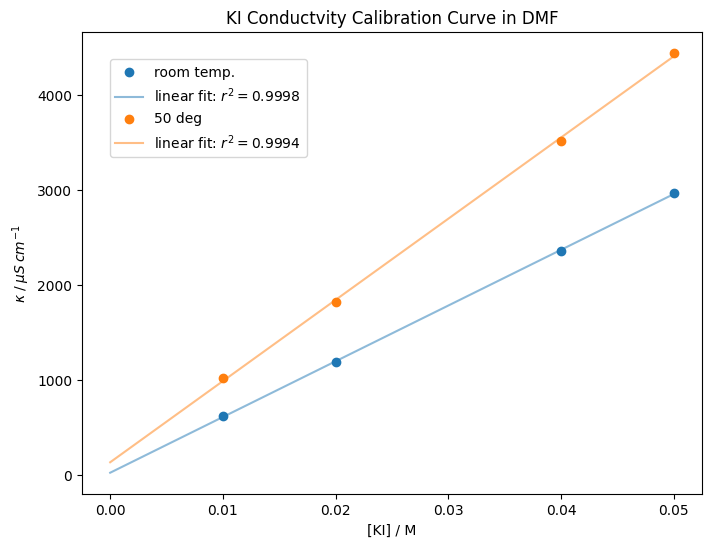

In [24]:
# for thesis

plt.figure(figsize=(8,6))
xs = np.linspace(0,0.05,10)

x = np.array(x_new).reshape(-1,1)
y = np.array(ki_new).reshape(-1,1)
plt.scatter(x,y,label='room temp.')
# straight line fit for whole fit
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(x.reshape(-1,1),y.reshape(-1,1))
m_22n_i = lin_reg.coef_[0][0]
c_22n_i = lin_reg.intercept_[0]
s = lin_reg.score(x.reshape(-1,1),y.reshape(-1,1))
plt.plot(xs,(m_22n_i*xs + c_22n_i),alpha=0.5, label=f'linear fit: $r^2 = {s:.4f}$')


x = np.array(x_new).reshape(-1,1)
y = np.array(ki_new_50).reshape(-1,1)
plt.scatter(x,y,label='50 deg')
# straight line fit for whole fit
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(x.reshape(-1,1),y.reshape(-1,1))
m_50n_i = lin_reg.coef_[0][0]
c_50n_i = lin_reg.intercept_[0]
s = lin_reg.score(x.reshape(-1,1),y.reshape(-1,1))
plt.plot(xs,(m_50n_i*xs + c_50n_i),alpha=0.5, label=f'linear fit: $r^2 = {s:.4f}$')

"""
x = np.array(ki_x).reshape(-1,1)
y = np.array(ki_c).reshape(-1,1)
plt.scatter(x,y,label='22 deg - old')
plt.plot(xs,(m2_i*xs + c2_i),alpha=0.5, label=f'linear fit; $r^2 = {s:.4f}$')
"""
plt.title('KI Conductvity Calibration Curve in DMF')
plt.xlabel('[KI] / M')
plt.ylabel('$\kappa \hspace{.3} / \hspace{.3} \mu S \hspace{.2} cm^{-1}$')
plt.legend(borderaxespad=2)
plt.show()

In [26]:
# max cond at 50 deg is 310 ish
144.7 * m_50n_i/m2_i
# therefore solubility also changes (which makes sense!)

221.13225744575666

In [27]:
# scale kcl cond curve by same temp factor as ki
m_50n_cl = m_cl * m_50n_i/m2_i
# I guess intercept shouldn't change as it is background cond of solvent - therefore only include once (subtract from all cond values)

In [28]:
max_cond_cl_50 = 357.6
background = c_50n_i # not sure about this number

max_conc_cl_50 = ( max_cond_cl_50 - background ) / m_50n_cl

In [29]:
max_conc_cl_50

0.0027959398877499485

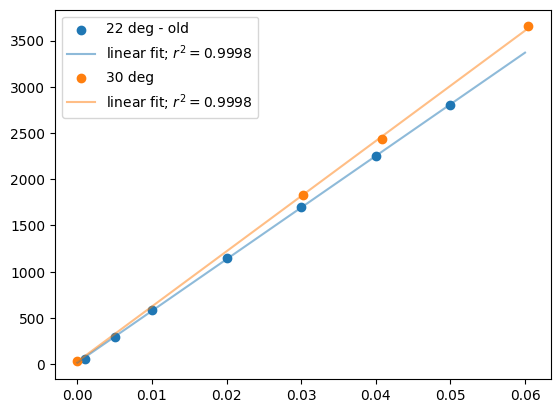

In [35]:
xs = np.linspace(0,0.06,10)


x = np.array(ki_x).reshape(-1,1)
y = np.array(ki_c).reshape(-1,1)
plt.scatter(x,y,label='22 deg - old')
plt.plot(xs,(m2_i*xs + c2_i),alpha=0.5, label=f'linear fit; $r^2 = {s:.4f}$')


x = np.array(ki_30_x).reshape(-1,1)
y = np.array(ki_30).reshape(-1,1)
plt.scatter(x,y,label='30 deg')
# straight line fit for whole fit
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(x.reshape(-1,1),y.reshape(-1,1))
m_30n_i = lin_reg.coef_[0][0]
c_30n_i = lin_reg.intercept_[0]
s = lin_reg.score(x.reshape(-1,1),y.reshape(-1,1))
plt.plot(xs,(m_30n_i*xs + c_30n_i),alpha=0.5, label=f'linear fit; $r^2 = {s:.4f}$')

plt.legend()
plt.show()

In [36]:
# scale kcl cond curve by same temp factor as ki
m_30n_cl = m_cl * m_30n_i/m2_i

In [37]:
max_cond_cl_30 = 183.9
background = c_30n_i

max_conc_cl_30 = ( max_cond_cl_30 - background ) / m_30n_cl

In [38]:
max_conc_cl_30

0.002810004877724509

RECAL - 26.06

In [39]:
recal_30_x = [0,0.01,0.02,0.03,0.04]
recal_30_c = [41.5,710,1381,1990,2770]
recal_50_x = [0,0.01,0.02,0.03,0.04,0.05,0.0586,0.0988,0.0382,0.0790]
recal_50_c = [165,1016,1840,2820,3860,4985,6287,13700,3700,9600]
recal_80_x = [0,0.01,0.04,0.05]
recal_80_c = [600,1795,6000,8010]

In [40]:
rerecal_50_x = [0,0.02,0.05,0.0586,0.1]
rerecal_50_c = [186,1680,3798,4466,7225]

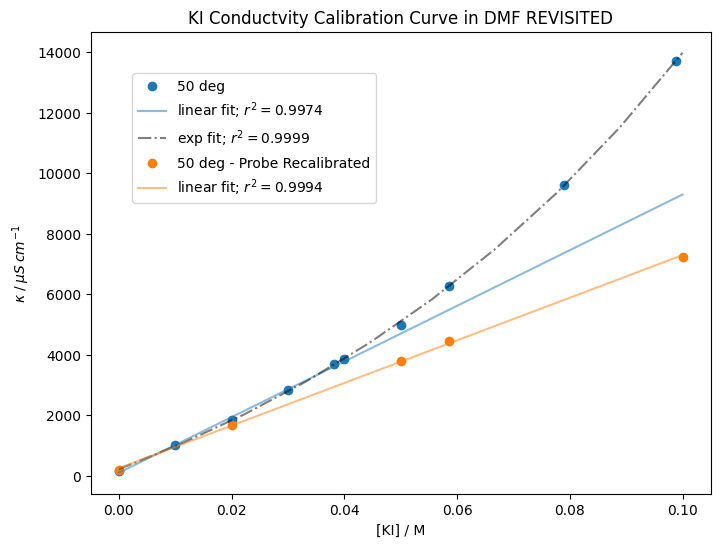

In [41]:
xs = np.linspace(0,0.1,10)

plt.figure(figsize=(8,6))
"""
x = np.array(recal_30_x).reshape(-1,1)
y = np.array(recal_30_c).reshape(-1,1)
plt.scatter(x,y,label='30 deg (recal)')
# straight line fit for whole fit
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(x.reshape(-1,1),y.reshape(-1,1))
m_30r_i = lin_reg.coef_[0][0]
c_30r_i = lin_reg.intercept_[0]
s = lin_reg.score(x.reshape(-1,1),y.reshape(-1,1))
plt.plot(xs,(m_30r_i*xs + c_30r_i),alpha=0.5, label=f'linear fit; $r^2 = {s:.4f}$')
"""
x = np.array(recal_50_x)
y = np.array(recal_50_c)
plt.scatter(x,y,label='50 deg')
# straight line fit for whole fit
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(x[:5].reshape(-1,1),y[:5].reshape(-1,1))
m_50r_i = lin_reg.coef_[0][0]
c_50r_i = lin_reg.intercept_[0]
s = lin_reg.score(x[:5].reshape(-1,1),y[:5].reshape(-1,1))
plt.plot(xs,(m_50r_i*xs + c_50r_i),alpha=0.5, label=f'linear fit; $r^2 = {s:.4f}$')

# exp fit
popt_exp, pcov = curve_fit( exp_n, x , y )
residuals2 = y - exp_n(x, *popt_exp)
ss_res2 = np.sum(residuals2**2)
ss_tot2 = np.sum((y-np.mean(y))**2)
s_exp = 1 - (ss_res2 / ss_tot2)
plt.plot(xs,exp_n(xs,*popt_exp), 'k-.', alpha = 0.5, label=f'exp fit; $r^2 = {s_exp:.4f}$')

"""
x = np.array(recal_80_x)
y = np.array(recal_80_c)
plt.scatter(x,y,label='80 deg (recal)')
# straight line fit for whole fit
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(x.reshape(-1,1),y.reshape(-1,1))
m_80r_i = lin_reg.coef_[0][0]
c_80r_i = lin_reg.intercept_[0]
s = lin_reg.score(x.reshape(-1,1),y.reshape(-1,1))
plt.plot(xs,(m_80r_i*xs + c_80r_i),alpha=0.5, label=f'linear fit; $r^2 = {s:.4f}$')

xs2 = np.linspace(0,0.05,10)
# exp fit
popt_exp_80, pcov = curve_fit( exp_n, x , y )
residuals3 = y - exp_n(x, *popt_exp_80)
ss_res3 = np.sum(residuals3**2)
ss_tot3 = np.sum((y-np.mean(y))**2)
s_exp_80 = 1 - (ss_res3 / ss_tot3)
plt.plot(xs2,exp_n(xs2,*popt_exp_80), 'k-.', alpha = 0.5, label=f'exp fit; $r^2 = {s_exp_80:.4f}$')
"""

x = np.array(rerecal_50_x).reshape(-1,1)
y = np.array(rerecal_50_c).reshape(-1,1)
plt.scatter(x,y,label='50 deg - Probe Recalibrated')
# straight line fit for whole fit
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(x.reshape(-1,1),y.reshape(-1,1))
m_50rr_i = lin_reg.coef_[0][0]
c_50rr_i = lin_reg.intercept_[0]
s = lin_reg.score(x.reshape(-1,1),y.reshape(-1,1))
plt.plot(xs,(m_50rr_i*xs + c_50rr_i),alpha=0.5, label=f'linear fit; $r^2 = {s:.4f}$')

plt.title('KI Conductvity Calibration Curve in DMF REVISITED')
plt.xlabel('[KI] / M')
plt.ylabel('$\kappa \hspace{.3} / \hspace{.3} \mu S \hspace{.2} cm^{-1}$')
plt.legend(borderaxespad=3)
plt.show()